In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

# Naive Bayes

In [26]:
# Load data.
data = load_iris()

In [3]:
# Display the description.
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
# Explanatory variables.
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Response variable.
Y = data['target']
labels = list(data['target_names'])
print(labels)


['setosa', 'versicolor', 'virginica']


visualize the frequency table  of the labels using barplot

In [50]:
iris_df=pd.DataFrame(data.data)
iris_df['class']=data.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df["class"].replace({0: "setosa", 1: "versicolor",2: "virginica"}, inplace=True)


versicolor    50
virginica     50
setosa        50
Name: class, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


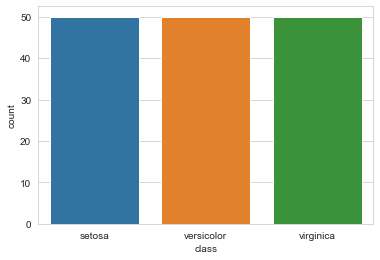

In [59]:
print (iris_df['class'].value_counts())
sns.countplot('class',data=iris_df)
plt.show()


plot a pairplot of your dataset , and use the class values in hue to label your scatter points

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


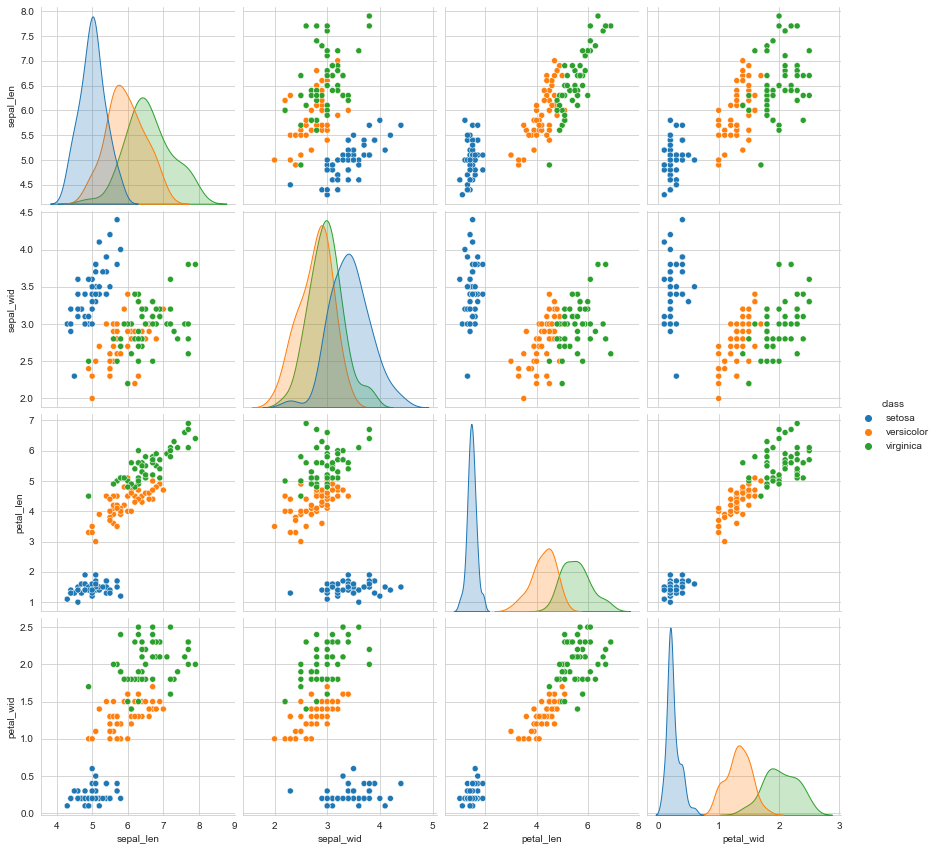

In [51]:
sns.set_style("whitegrid")
sns.pairplot(iris_df,hue="class",size=3)
plt.show()

split your dataset to train and test set  **(set test_size to 30% )**

In [70]:
# Split the dataset into training and testing.
# Split the dataset into training and testing.
X_train,X_test,Y_train,Y_test=train_test_split(data.data,data.target,test_size=0.3,random_state=1)

fit a GaussianNB on train set and make prediction on testset

In [72]:
# Train and predict.
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred


array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

use the previous result and plot the confusion matrix

In [73]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(Y_test,y_pred)
accuracy

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]], dtype=int64)

In [97]:
def plot_confusion_matrix (Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

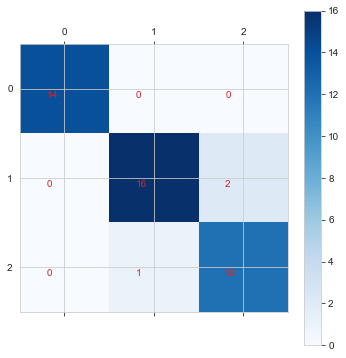

In [98]:
plot_confusion_matrix(Y_test,y_pred)

calculate the accuracy using sklearn

In [74]:
print ("The model accuracy on the testing set : ", accuracy_score(Y_test, y_pred))

The model accuracy on the testing set :  0.9333333333333333


visualize the parameters of the GuassianNB after training , store theta in ``centers`` and sigma in ``variances``  

In [121]:
variances= model.sigma_
centers = model.theta_
print('variances :\n',variances)
print('\n centers :',centers)


variances :
 [[0.11076389 0.13749229 0.02712192 0.01166667]
 [0.28389649 0.11234375 0.22859375 0.04280274]
 [0.39589482 0.08560994 0.33687363 0.07751644]]

 centers : [[4.94166667 3.35277778 1.46944444 0.23333333]
 [5.928125   2.7375     4.2125     1.303125  ]
 [6.52432432 2.99189189 5.53513514 2.02432432]]


complete this code to reproduce the plot below 

No handles with labels found to put in legend.


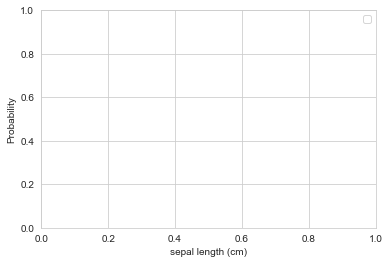

No handles with labels found to put in legend.


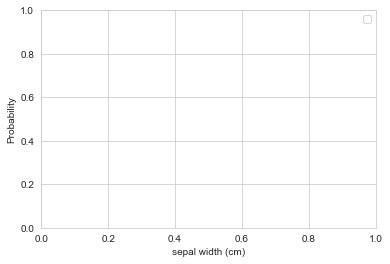

No handles with labels found to put in legend.


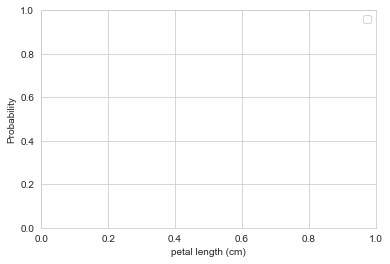

No handles with labels found to put in legend.


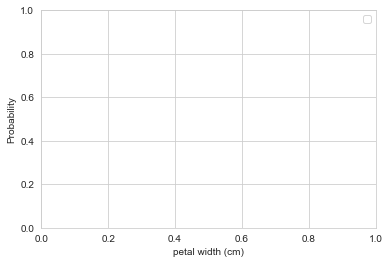

In [109]:

my_cols_dict = {0:'red', 1:'green', 2:'blue'}

for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig, ax = plt.subplots()
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    
   
    ###############################
    ##write your code here 

    ################################
    ax.legend(loc=0)
    plt.show()    

In [123]:
probas = model.predict_proba(X_test) 
print (probas)

[[1.00000000e+000 7.30172724e-017 1.92698897e-023]
 [1.83127445e-031 9.99999349e-001 6.50949259e-007]
 [6.64026638e-099 9.71309470e-001 2.86905301e-002]
 [1.00000000e+000 4.50426332e-015 5.93894621e-022]
 [1.24729705e-266 1.50022255e-009 9.99999998e-001]
 [1.25848413e-120 4.97361143e-001 5.02638857e-001]
 [8.22548006e-192 6.90370263e-007 9.99999310e-001]
 [1.00000000e+000 3.05551312e-011 3.69926602e-018]
 [1.00000000e+000 1.34176387e-015 8.87395065e-023]
 [1.55475502e-229 2.00287031e-008 9.99999980e-001]
 [4.44110262e-082 9.99584753e-001 4.15247469e-004]
 [1.00000000e+000 8.14093994e-013 1.12264893e-019]
 [1.14065997e-230 2.17224776e-007 9.99999783e-001]
 [1.44834682e-106 8.84361311e-001 1.15638689e-001]
 [2.27759005e-105 9.66946340e-001 3.30536601e-002]
 [1.00000000e+000 2.98417907e-017 1.87295578e-024]
 [1.26088164e-070 9.99923670e-001 7.63296422e-005]
 [9.89241676e-104 9.75618268e-001 2.43817319e-002]
 [1.00000000e+000 6.22633347e-013 6.56696474e-020]
 [1.00000000e+000 6.63890281e-0